In [16]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import scipy
import scipy.stats
import matplotlib.ticker as ticker
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy import stats
from scipy.stats import norm
from  scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import *
from matplotlib.ticker import NullFormatter
from matplotlib import font_manager

##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 
plt.rc('font', family='Helvetica')

## Redo fit of ubpws10  for Fig3B using full q-range and w/o BME 

In [17]:
## Load all fits and average them
fits1 = []

#Fits
dirs1 = sorted(glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat'))
#print(dirs1)
for num1, file in enumerate(dirs1):

    fits1.append(np.genfromtxt(file, skip_header=6)) ;# skip_footer=10 

#num_curves1 = len(fits1)

#colors1 = [cm.rainbow(k/float(num_curves1),1) for k in range(num_curves1)]
#colors1 = [cm.hsv(k/float(num_curves1),1) for k in range(num_curves1)]

mean = []
for num1, fit in enumerate(fits1):
    #if num == 0:
    #ax2.loglog(fit[:,0],fit[:,1],c=colors1[num1], alpha=0.3, linewidth=1)
    #ax2.loglog(fit[:,0],fit[:,3],c='silver', alpha=0.3, linewidth=1)
    mean.append(fit[:,3])
#Exp_front

mean = np.array(mean).mean(axis=0)

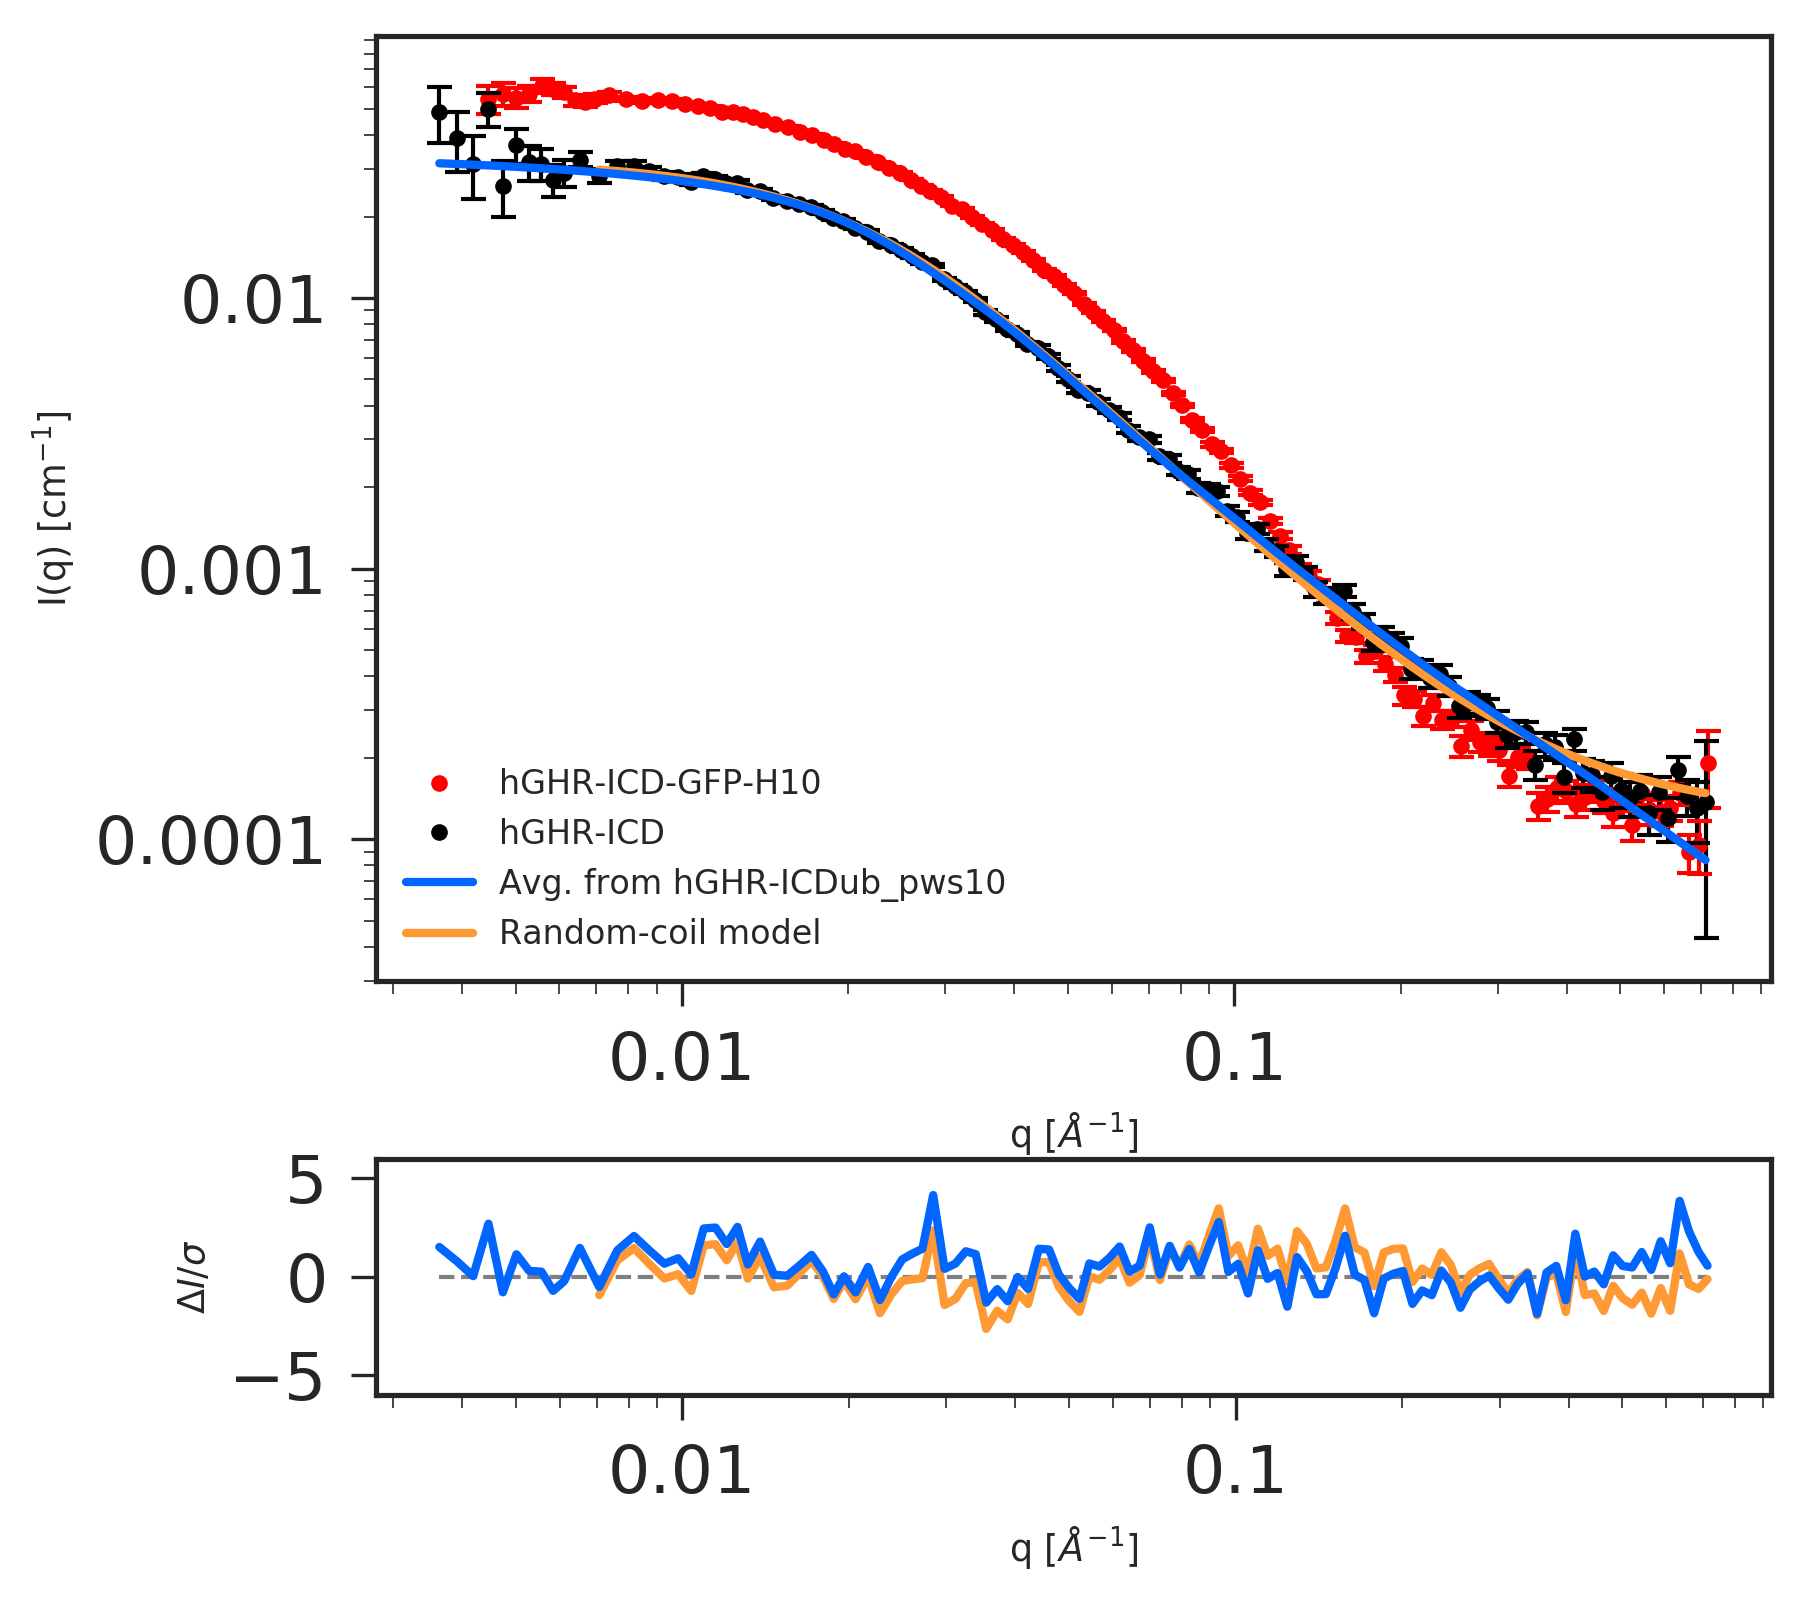

In [34]:
import matplotlib.ticker as mticker
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

# Exp data ICD-GFP
exp_gfp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/GHRICDGFP_0p85mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);

# Exp data ICD
exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
exp2 = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=12);

# UBpws10

sts2 = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/GHR_ICDfl_ub_pws10_fAA_frame999.pdb_fitq075avp.dat", skip_header=6)
#sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_3_.stats.dat");
#sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_3_.stats.dat");
#sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_qminABGRCM_3_.stats.dat");

# ABGRCM
ABRCM = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/AB_RCM/AB_random_coil_model_fit.dat", skip_header=3);

## Fig

fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = False, gridspec_kw = {"height_ratios" : [4,1], "hspace" : 0.3},figsize=(6, 6))

#Experimental
ax0.loglog( exp_gfp[:,0],exp_gfp[:,1], 'o',alpha=1, c='red',markersize = 4, label = 'hGHR-ICD-GFP-H10')
ax0.errorbar (exp_gfp[:,0],exp_gfp[:,1],yerr=exp_gfp[:,2],alpha=1,capsize=3, elinewidth=1, markeredgewidth=1, c='red', lw=1, ls='none')

ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 4, label = 'hGHR-ICD')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=3, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
## Mean of fits
ax0.loglog(fits1[0][:,0],mean,c='#0066ff', alpha=1, linewidth=2, zorder=4, label = 'Avg. from hGHR-ICDub_pws10')
#ax0.loglog( sts[:,0],sts[:,3],label="Non-rew",c='blue', linewidth = 2, zorder = 5)
ax0.loglog( ABRCM[:,0],ABRCM[:,1],label="Random-coil model",c="#FF9933", linewidth = 2, zorder = 3)


ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=16)

ax0.set_xlabel( r'q [$\AA^{-1}$]' )
#ax0.ticklabel_format(useOffset=False, style='plain')

#ax0.xaxis.set_major_formatter(mticker.ScalarFormatter())
#ax0.xaxis.get_major_formatter().set_scientific(False)
#ax0.xaxis.get_major_formatter().set_useOffset(False)

#ax0.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax0.yaxis.get_major_formatter().set_scientific(False)
#ax0.yaxis.get_major_formatter().set_useOffset(False)

from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax0.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))



#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )
ax1.plot( ABRCM[:,0], ( exp2[:,1] - ABRCM[:,1] ) / exp2[:,2], c='#FF9933', linewidth = 2, label = 'ABRCM' )
#ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c='blue', linewidth = 2, label = 'Non-rew' )
ax1.plot(fits1[0][:,0],(sts2[:,1] - mean ) / sts2[:,2],c='#0066ff', alpha=1, linewidth=2, zorder=3)
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

ax1.set_ylim((-6,6))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=16)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/GHR_ICD_Fig3B_redo_ubpws10_fullq_data_020929.dat',np.transpose([exp[:,0],exp[:,1],exp[:,2],mean]), delimiter = ' ',fmt='%s')

#plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/GHR_ICD_Fig3B_redo_ubpws10_fullq_GRCM_rightcolors_020929.pdf', format = 'pdf',dpi=300)
plt.show()

In [32]:
#sts = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1)
chisq1=np.sum( ((sts2[:,1]-mean)/sts2[:,2])**2 )
chisq2=np.sum( ((exp2[:,1] - ABRCM[:,1])/exp2[:,2])**2 )
print (chisq1)

chisq1r= chisq1/(118)
chisq2r= chisq2/(115)

print (chisq1r)
print (chisq2r)

178.29431845
1.51096880042
1.38872117308
